The Mridangam Stroke Dataset
============================

The MTG proposes a few [datasets](https://www.upf.edu/web/mtg/software-datasets) that may be used for the instrument classification task: 
* [IRMAS](https://www.upf.edu/web/mtg/irmas) - containing annotated samples of multiple instruments 
* [Good Sounds](https://www.upf.edu/web/mtg/good-sounds) - containing monophonic sounds (notes and scales) for various instruments
* [Mridangam Stroke](https://compmusic.upf.edu/mridangam-stroke-dataset) containing isolated drum strokes and the annotated tonic

All these datasets may be downloaded from zenodo. In addition, these datasets may be loaded and validated with easy using the [mirdata](https://github.com/mir-dataset-loaders/mirdata) library. 

For educational purposes, we will work with the Mridangam Stroke dataset.


## Instalation of packages

To download, validate, and load the data we use the mirdata library.
We use MTG's [essentia](https://essentia.upf.edu) for audio loading and feature computation. Matplotlib's pyplot is used for plotting and pandas for data stats. 
We install these libraries through PyPI. 

In [1]:
%%capture
#If not installed, install Essentia. 
# This cell is for running the notebook in Colab
import importlib.util
if importlib.util.find_spec('essentia') is None:
    !pip install essentia

!pip install git+https://github.com/mir-dataset-loaders/mirdata.git
!pip install pandas
!pip install matplotlib

In [2]:
#Basic imports
import os
import matplotlib.pyplot as plt
import numpy as np

# Imports to support MIR
import mirdata
import essentia.standard as ess
import pandas as pd




## Dataset description
### Data downloading, validation

In [3]:
#Import Mridangam Stroke Dataset
mridangam_stroke = mirdata.initialize('mridangam_stroke')

#This cell downloads and validates the mridangam dataset
mridangam_stroke.download()  # download the dataset
mridangam_stroke.validate()  # validate that all the expected files are there

INFO: Downloading ['remote_data'] to /Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke


INFO: [remote_data] downloading mridangam_stroke_1.5.zip


INFO: /Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5.zip already exists and will not be downloaded. Rerun with force_overwrite=True to delete this file and force the download.


  0%|          | 0/6976 [00:00<?, ?it/s]

  7%|▋         | 472/6976 [00:00<00:01, 4713.03it/s]

 14%|█▍        | 971/6976 [00:00<00:01, 4871.19it/s]

 21%|██        | 1459/6976 [00:00<00:01, 4778.52it/s]

 28%|██▊       | 1938/6976 [00:00<00:01, 4770.67it/s]

 35%|███▍      | 2416/6976 [00:00<00:00, 4744.38it/s]

 41%|████▏     | 2891/6976 [00:00<00:00, 4132.01it/s]

 48%|████▊     | 3317/6976 [00:00<00:00, 3964.73it/s]

 53%|█████▎    | 3722/6976 [00:00<00:00, 3669.73it/s]

 59%|█████▊    | 4097/6976 [00:01<00:00, 3455.82it/s]

 64%|██████▍   | 4449/6976 [00:01<00:00, 3346.27it/s]

 69%|██████▊   | 4788/6976 [00:01<00:00, 2993.51it/s]

 73%|███████▎  | 5095/6976 [00:01<00:00, 2608.22it/s]

 77%|███████▋  | 5367/6976 [00:01<00:00, 2618.16it/s]

 81%|████████  | 5637/6976 [00:01<00:00, 2281.84it/s]

 84%|████████▍ | 5876/6976 [00:01<00:00, 1908.59it/s]

 87%|████████▋ | 6081/6976 [00:02<00:00, 1763.31it/s]

 91%|█████████▏| 6380/6976 [00:02<00:00, 2035.33it/s]

 95%|█████████▍| 6613/6976 [00:02<00:00, 2105.79it/s]

 98%|█████████▊| 6837/6976 [00:02<00:00, 2034.73it/s]

100%|██████████| 6976/6976 [00:02<00:00, 2894.08it/s]


INFO: Success: the dataset is complete and all files are valid.


INFO: --------------------


({'tracks': {}}, {'tracks': {}})

In the mirdata library the track ids in the dataset can be seen retrieved using the *track_ids* attribute. The *load_tracks* methods loads all the tracks in a dictionary. 

In [4]:
mridangam_ids = mridangam_stroke.track_ids  # Load Mridangam IDs
mridangam_data = mridangam_stroke.load_tracks()  # Load Mridangam data

mridangam_data[mridangam_ids[0]]  # Visualize a single track

Track(
  audio_path="...mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav",
  stroke_name="bheem",
  tonic="B",
  track_id="224030",
  audio: The track's audio

        Returns,
)

In [5]:
# Get complete list of different strokes
stroke_names = []
for i in mridangam_ids:
    stroke_names.append(mridangam_data[i].stroke_name)
stroke_names = np.unique(stroke_names)

print(stroke_names)

['bheem' 'cha' 'dheem' 'dhin' 'num' 'ta' 'tha' 'tham' 'thi' 'thom']


In [6]:
# You can create a dictionary using stroke type as keys
stroke_dict = {item: [] for item in stroke_names}
for i in mridangam_ids:
    stroke_dict[mridangam_data[i].stroke_name].append(mridangam_data[i].audio_path)

stroke_dict['bheem']

['/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224030__akshaylaya__bheem-b-001.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224031__akshaylaya__bheem-b-002.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224032__akshaylaya__bheem-b-003.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224033__akshaylaya__bheem-b-004.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/B/224034__akshaylaya__bheem-b-005.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/C/225356__akshaylaya__bheem-c-001.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/C/225357__akshaylaya__bheem-c-002.wav',
 '/Volumes/storessd/Users/mariusmiron/mir_datasets/mridangam_stroke/mridangam_stroke_1.5/C/225358

Plot waveforms of random samples of each stroke type...


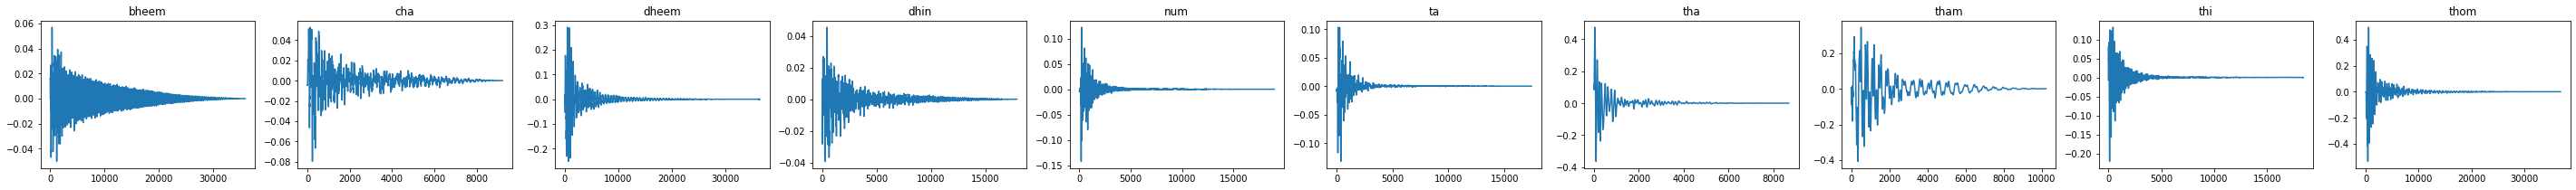

In [7]:
# Raw-data preprocess analysis parameters
_, fs = mridangam_data[mridangam_ids[0]].audio

num_strokes = len(stroke_dict.keys())
print("Plot waveforms of random samples of each stroke type...")
plt.figure(1, figsize=(5 * num_strokes, 3))
file_ind_inlist = 0 # 0: let's take the first file in the list for sample plots
for i, stroke in enumerate(stroke_dict.keys()):
    sample_file = stroke_dict[stroke][file_ind_inlist]
    x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
    
    plt.subplot(1,num_strokes,(i+1))
    plt.plot(x)
    plt.title(stroke)